In [54]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import itertools

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

train = pd.read_csv('dataset/train.csv')
print('Shape of the train data with all features:', train.shape)
train = train.select_dtypes(exclude=['object'])
print("")
print('Shape of the train data with numerical features:', train.shape)
train.drop('Id',axis = 1, inplace = True)
train.fillna(0,inplace=True)
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

train.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], inplace=True)

test = pd.read_csv('dataset/test.csv')
test = test.select_dtypes(exclude=['object'])
ID = test.Id
test.fillna(0,inplace=True)
test.drop('Id',axis = 1, inplace = True)
test['TotalSF'] = test['TotalBsmtSF'] + test['1stFlrSF'] + test['2ndFlrSF']

test.drop(columns=['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], inplace=True)

print("")
print("List of features contained our dataset:",list(train.columns))

Shape of the train data with all features: (1460, 81)

Shape of the train data with numerical features: (1460, 38)

List of features contained our dataset: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'TotalSF']


In [55]:
from sklearn.ensemble import IsolationForest

clf = IsolationForest(max_samples = 100, random_state = 42)
clf.fit(train)
y_noano = clf.predict(train)
y_noano = pd.DataFrame(y_noano, columns = ['Top'])
y_noano[y_noano['Top'] == 1].index.values

train = train.iloc[y_noano[y_noano['Top'] == 1].index.values]
train.reset_index(drop = True, inplace = True)
print("Number of Outliers:", y_noano[y_noano['Top'] == -1].shape[0])
print("Number of rows without outliers:", train.shape[0])

Number of Outliers: 146
Number of rows without outliers: 1314


In [56]:
import warnings
warnings.filterwarnings('ignore')

col_train = list(train.columns)
col_train_bis = list(train.columns)

col_train_bis.remove('SalePrice')

mat_train = np.matrix(train)
mat_test  = np.matrix(test)
mat_new = np.matrix(train.drop('SalePrice',axis = 1))
mat_y = np.array(train.SalePrice).reshape((1314,1))

prepro_y = MinMaxScaler()
prepro_y.fit(mat_y)

prepro = MinMaxScaler()
prepro.fit(mat_train)

prepro_test = MinMaxScaler()
prepro_test.fit(mat_new)

train = pd.DataFrame(prepro.transform(mat_train),columns = col_train)
test  = pd.DataFrame(prepro_test.transform(mat_test),columns = col_train_bis)

#print(train['TotalBsmtSF'])
#print(train['1stFlrSF'])
#print(train['2ndFlrSF'])



In [57]:
# List of features
COLUMNS = col_train
FEATURES = col_train_bis
LABEL = "SalePrice"

# Columns
feature_cols = FEATURES

# Training set and Prediction set with the features to predict
training_set = train[COLUMNS]
prediction_set = train.SalePrice

# Train and Test 
x_train, x_test, y_train, y_test = train_test_split(training_set[FEATURES] , prediction_set, test_size=0.33, random_state=42)
y_train = pd.DataFrame(y_train, columns = [LABEL])
training_set = pd.DataFrame(x_train, columns = FEATURES).merge(y_train, left_index = True, right_index = True)
training_set.head()

# Training for submission
training_sub = training_set[col_train]

In [58]:
# Same thing but for the test set
y_test = pd.DataFrame(y_test, columns = [LABEL])
testing_set = pd.DataFrame(x_test, columns = FEATURES).merge(y_test, left_index = True, right_index = True)
testing_set.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,TotalSF,SalePrice
1232,0.352941,0.255591,0.072904,0.500,0.571429,0.581395,0.766667,0.00000,0.442021,0.0,...,0.076923,0.0,0.0,0.449495,0.0,0.000000,0.818182,0.50,0.446627,0.321701
76,0.352941,0.000000,0.063505,0.625,0.428571,0.891473,0.766667,0.01375,0.000000,0.0,...,0.197802,0.0,0.0,0.000000,0.0,0.045161,0.363636,0.75,0.262939,0.329114
962,0.176471,0.191693,0.083444,0.375,0.857143,0.434109,0.650000,0.00000,0.332979,0.0,...,0.057692,0.0,0.0,0.000000,0.0,0.032258,0.272727,0.00,0.356285,0.332821
433,0.000000,0.000000,0.056724,0.375,0.714286,0.635659,0.850000,0.00000,0.312766,0.0,...,0.362637,0.0,0.0,0.000000,0.0,0.000000,0.181818,0.25,0.295287,0.240157
1110,0.823529,0.115016,0.011665,0.625,0.428571,0.953488,0.883333,0.06625,0.000000,0.0,...,0.074176,0.0,0.0,0.000000,0.0,0.000000,0.454545,1.00,0.385860,0.346412


In [106]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(64, input_dim=34, kernel_initializer='normal', activation='relu')) #200
model.add(Dropout(0.2))
model.add(Dense(128, kernel_initializer='normal', activation='relu')) #100
model.add(Dense(256, kernel_initializer='normal', activation='relu')) #50
#model.add(Dense(25, kernel_initializer='normal', activation='relu')) #25
model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
#model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adadelta())
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(lr=0.001))

feature_cols = training_set[FEATURES]
labels = training_set[LABEL].values
model.fit(np.array(feature_cols), np.array(labels), epochs=500, batch_size=100)

Epoch 1/500
880/880 [==============================] - 2s 2ms/step - loss: 0.1109
Epoch 2/500
880/880 [==============================] - 0s 91us/step - loss: 0.0301
Epoch 3/500
880/880 [==============================] - 0s 91us/step - loss: 0.0195
Epoch 4/500
880/880 [==============================] - 0s 97us/step - loss: 0.0154
Epoch 5/500
880/880 [==============================] - 0s 309us/step - loss: 0.0132
Epoch 6/500
880/880 [==============================] - 0s 93us/step - loss: 0.0109
Epoch 7/500
880/880 [==============================] - 0s 92us/step - loss: 0.0095
Epoch 8/500
880/880 [==============================] - 0s 93us/step - loss: 0.0082
Epoch 9/500
880/880 [==============================] - 0s 94us/step - loss: 0.0074
Epoch 10/500
880/880 [==============================] - 0s 111us/step - loss: 0.0068
Epoch 11/500
880/880 [==============================] - 0s 98us/step - loss: 0.0059
Epoch 12/500
880/880 [==============================] - 0s 100us/step - loss: 0.0063

880/880 [==============================] - 0s 98us/step - loss: 0.0023
Epoch 98/500
880/880 [==============================] - 0s 99us/step - loss: 0.0026
Epoch 99/500
880/880 [==============================] - 0s 96us/step - loss: 0.0026
Epoch 100/500
880/880 [==============================] - 0s 95us/step - loss: 0.0023
Epoch 101/500
880/880 [==============================] - 0s 97us/step - loss: 0.0024
Epoch 102/500
880/880 [==============================] - 0s 97us/step - loss: 0.0025
Epoch 103/500
880/880 [==============================] - 0s 99us/step - loss: 0.0022
Epoch 104/500
880/880 [==============================] - 0s 101us/step - loss: 0.0024
Epoch 105/500
880/880 [==============================] - 0s 100us/step - loss: 0.0024
Epoch 106/500
880/880 [==============================] - 0s 96us/step - loss: 0.0023
Epoch 107/500
880/880 [==============================] - 0s 100us/step - loss: 0.0022
Epoch 108/500
880/880 [==============================] - 0s 96us/step - loss: 

880/880 [==============================] - 0s 315us/step - loss: 0.0017
Epoch 193/500
880/880 [==============================] - 0s 104us/step - loss: 0.0017
Epoch 194/500
880/880 [==============================] - 0s 98us/step - loss: 0.0019
Epoch 195/500
880/880 [==============================] - 0s 103us/step - loss: 0.0018
Epoch 196/500
880/880 [==============================] - 0s 103us/step - loss: 0.0017
Epoch 197/500
880/880 [==============================] - 0s 99us/step - loss: 0.0019
Epoch 198/500
880/880 [==============================] - 0s 99us/step - loss: 0.0016
Epoch 199/500
880/880 [==============================] - 0s 101us/step - loss: 0.0017
Epoch 200/500
880/880 [==============================] - 0s 98us/step - loss: 0.0016
Epoch 201/500
880/880 [==============================] - 0s 100us/step - loss: 0.0018
Epoch 202/500
880/880 [==============================] - 0s 101us/step - loss: 0.0016
Epoch 203/500
880/880 [==============================] - 0s 98us/step - 

880/880 [==============================] - 0s 103us/step - loss: 0.0014
Epoch 288/500
880/880 [==============================] - 0s 101us/step - loss: 0.0015
Epoch 289/500
880/880 [==============================] - 0s 100us/step - loss: 0.0013
Epoch 290/500
880/880 [==============================] - 0s 101us/step - loss: 0.0013
Epoch 291/500
880/880 [==============================] - 0s 99us/step - loss: 0.0014
Epoch 292/500
880/880 [==============================] - 0s 108us/step - loss: 0.0015
Epoch 293/500
880/880 [==============================] - 0s 103us/step - loss: 0.0014
Epoch 294/500
880/880 [==============================] - 0s 102us/step - loss: 0.0014
Epoch 295/500
880/880 [==============================] - 0s 104us/step - loss: 0.0013
Epoch 296/500
880/880 [==============================] - 0s 312us/step - loss: 0.0015
Epoch 297/500
880/880 [==============================] - 0s 103us/step - loss: 0.0014
Epoch 298/500
880/880 [==============================] - 0s 104us/ste

880/880 [==============================] - 0s 107us/step - loss: 0.0010
Epoch 383/500
880/880 [==============================] - 0s 103us/step - loss: 9.9600e-04
Epoch 384/500
880/880 [==============================] - 0s 101us/step - loss: 0.0011
Epoch 385/500
880/880 [==============================] - 0s 108us/step - loss: 0.0011
Epoch 386/500
880/880 [==============================] - 0s 100us/step - loss: 0.0010
Epoch 387/500
880/880 [==============================] - 0s 102us/step - loss: 0.0011
Epoch 388/500
880/880 [==============================] - 0s 101us/step - loss: 0.0011
Epoch 389/500
880/880 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 390/500
880/880 [==============================] - 0s 101us/step - loss: 0.0012
Epoch 391/500
880/880 [==============================] - 0s 102us/step - loss: 0.0012
Epoch 392/500
880/880 [==============================] - 0s 105us/step - loss: 0.0012
Epoch 393/500
880/880 [==============================] - 0s 104u

880/880 [==============================] - 0s 115us/step - loss: 9.2878e-04
Epoch 477/500
880/880 [==============================] - 0s 115us/step - loss: 9.9772e-04
Epoch 478/500
880/880 [==============================] - 0s 111us/step - loss: 0.0011
Epoch 479/500
880/880 [==============================] - 0s 109us/step - loss: 0.0010
Epoch 480/500
880/880 [==============================] - 0s 111us/step - loss: 0.0011
Epoch 481/500
880/880 [==============================] - 0s 111us/step - loss: 9.7685e-04
Epoch 482/500
880/880 [==============================] - 0s 112us/step - loss: 9.3545e-04
Epoch 483/500
880/880 [==============================] - 0s 111us/step - loss: 0.0010
Epoch 484/500
880/880 [==============================] - 0s 109us/step - loss: 0.0011
Epoch 485/500
880/880 [==============================] - 0s 116us/step - loss: 9.6187e-04
Epoch 486/500
880/880 [==============================] - 0s 116us/step - loss: 0.0010
Epoch 487/500
880/880 [=========================

In [107]:
# Evaluation on the test set created by train_test_split
model.evaluate(np.array(feature_cols), np.array(labels))

880/880 [==============================] - 0s 515us/step


0.005132530290972103

In [108]:
# Predictions
feature_cols_test = testing_set[FEATURES]
labels_test = testing_set[LABEL].values

y = model.predict(np.array(feature_cols_test))
predictions = list(itertools.islice(y, testing_set.shape[0]))

In [109]:
predictions = prepro_y.inverse_transform(np.array(predictions).reshape(434,1))

In [110]:
reality = prepro.inverse_transform(testing_set)

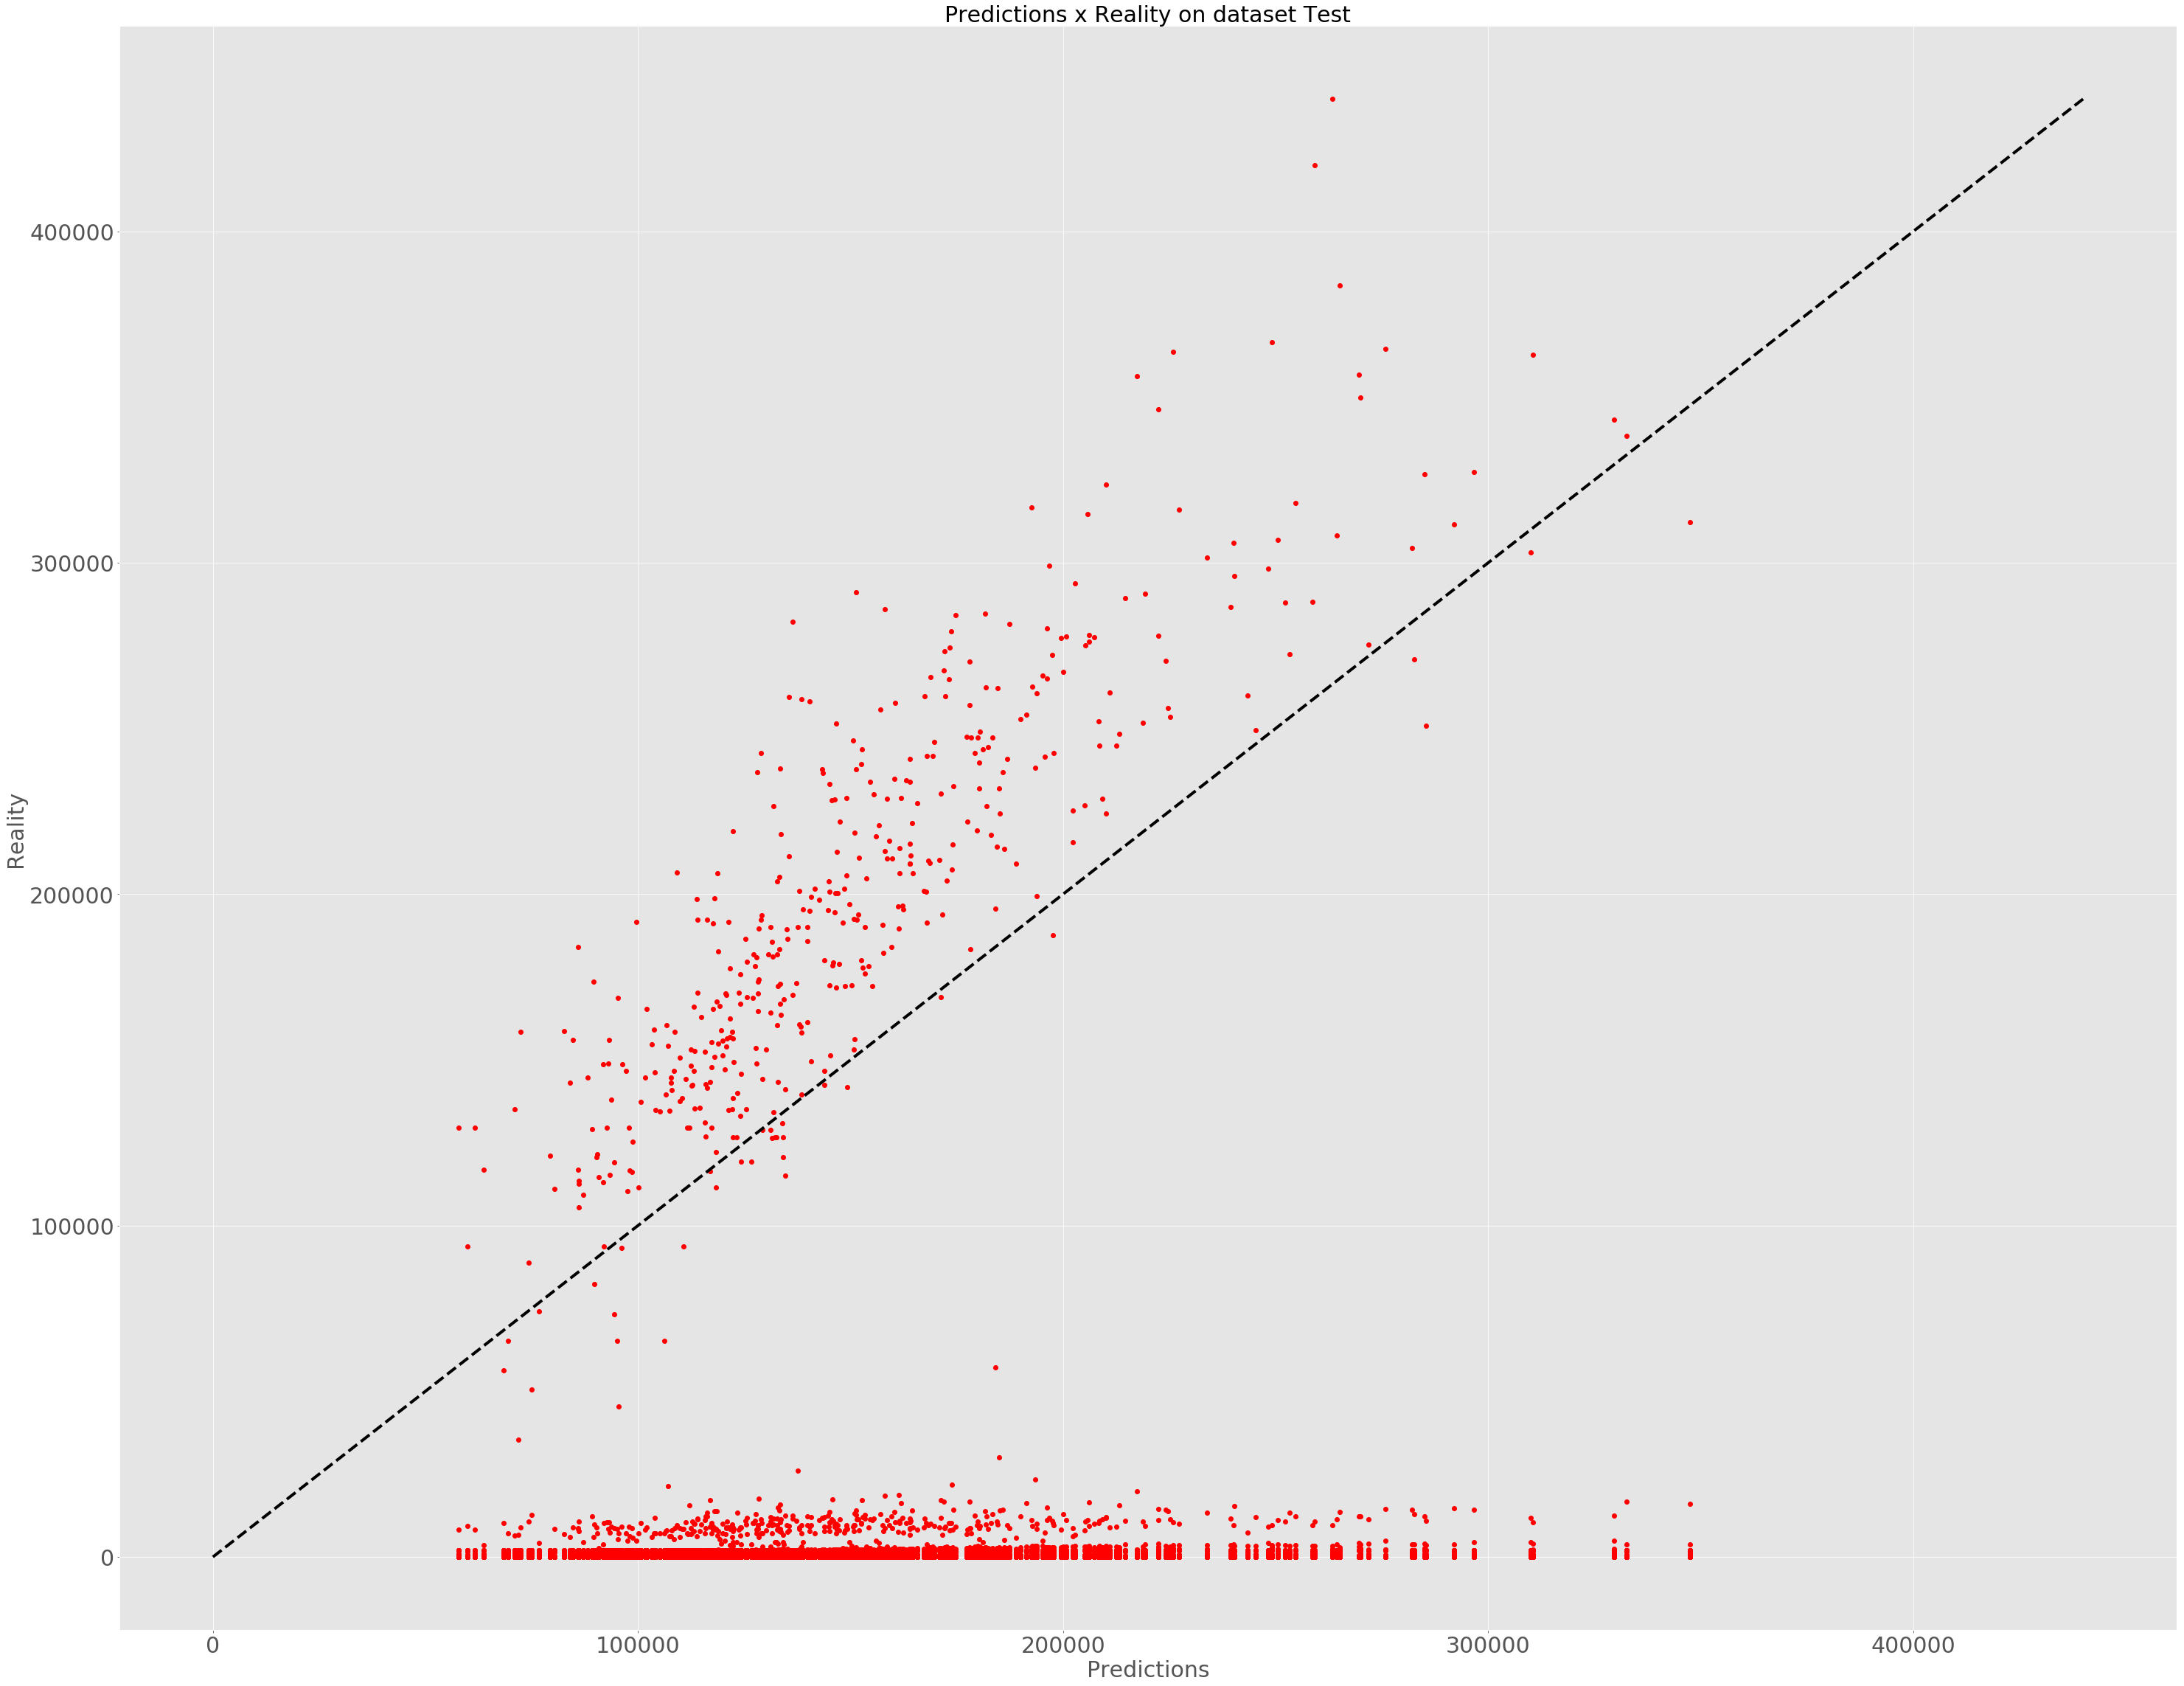

In [111]:
matplotlib.rc('xtick', labelsize=30) 
matplotlib.rc('ytick', labelsize=30) 

fig, ax = plt.subplots(figsize=(50, 40))

plt.style.use('ggplot')
plt.plot(predictions, reality, 'ro')
plt.xlabel('Predictions', fontsize = 30)
plt.ylabel('Reality', fontsize = 30)
plt.title('Predictions x Reality on dataset Test', fontsize = 30)
ax.plot([reality.min(), reality.max()], [reality.min(), reality.max()], 'k--', lw=4)
plt.show()

In [112]:
y_predict = model.predict(np.array(test))

def to_submit(pred_y,name_out):
    y_tmp = list(itertools.islice(pred_y, test.shape[0]))
    y_predict = pd.DataFrame(ID)
    
    y_predict = y_predict.join(pd.DataFrame(prepro_y.inverse_transform(np.array(y_tmp).reshape(len(y_tmp),1)), columns = ['SalePrice']))
    y_predict.to_csv(name_out + '.csv',index=False)
    
to_submit(y_predict, "submission8_0.005132530290972103")